In [1]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.5 MB/s eta 0:00:00


## Importing the dataset from Kaggle

In [2]:
# Installing the Kaggle library
!pip install kaggle

In [3]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
 # Getting the dataset by its API
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:08<00:00, 129MB/s]
100% 715M/715M [00:08<00:00, 84.8MB/s]


In [5]:
# Extracting the dataset from the cifar-10.zip file
from zipfile import ZipFile

with ZipFile("/content/cifar-10.zip") as zip:
  zip.extractall()
  print("The dataset has been extracted from the zip file!")

The dataset has been extracted from the zip file!


In [6]:
# Extracting the dataset from the 7z file
import py7zr

with py7zr.SevenZipFile("/content/train.7z") as z:
  z.extractall()
  print("The dataset has been extracted from the 7z file!")

The dataset has been extracted from the 7z file!


## Importing some of the required libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Doing some data analysis

### The number of images in the train folder

In [8]:
import os

images = os.listdir("/content/train")
print("The number of images in the train folder is: ", len(images))

The number of images in the train folder is:  50000


### Discovering the different classes of images and their numbers

In [9]:
# Getting the labels dataframe
labels = pd.read_csv("/content/trainLabels.csv")

In [10]:
# Displaying the first rows of the labels dataframe
labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [11]:
# The number of unique classes in the image dataset
labels['label'].nunique()

10

In [12]:
# Shoing the different classes in image dataset
labels['label'].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

In [13]:
# The distribution of each class in the image dataset
labels['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

### Displaying the first two images from the image dataset

In [14]:
images[:2]

['26575.png', '24750.png']

The size image is: (32, 32)


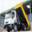


The size image is: (32, 32)


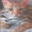

In [15]:
from PIL import Image

for image in images[:2]:
  img = Image.open("train/"+image)
  print("The size image is:", img.size)
  display(img)
  print()

* Since all the images have the same shape (32,32), the reshaping of images is optional

## Sorting the images in ascending order

In [16]:
images1 = []
num_images = []

for image in images:
  num_images.append(int(image[:-4]))
num_images.sort()

for num_image in num_images:
  images1.append(str(num_image) + ".png")

In [17]:
images1[:5]

['1.png', '2.png', '3.png', '4.png', '5.png']

In [18]:
images1[-5:]

['49996.png', '49997.png', '49998.png', '49999.png', '50000.png']

## Converting the images into a numpy array / Getting the independent variables

In [19]:
X = []
for image in images1:
  img = Image.open("train/"+image)
  X.append(np.array(img))
X = np.array(X)

In [20]:
print(X.shape)

(50000, 32, 32, 3)


## Encoding the labels / Getting the dependent variable

In [21]:
labels['label'].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

In [22]:
classes = {
    'frog': 0,
    'truck': 1,
    'deer': 2,
    'automobile': 3,
    'bird': 4,
    'horse': 5,
    'ship': 6,
    'cat': 7,
    'dog': 8,
    'airplane': 9
    }

y = np.array([classes[label] for label in labels['label']])

In [23]:
y.shape

(50000,)

## Splitting the dataset into the training set and the test set

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000,)
(10000,)


## Normalizing the dependent variables

In [26]:
X_train = X_train/255
X_test = X_test/255

## Building the neural network

In [27]:
import tensorflow as tf

* Firstly let's start by building an artificial neural network from scratch

In [28]:
# Building the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [29]:
# Compiling the ANN model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [30]:
# Training the ANN model
model.fit(X_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 9s 3ms/step - loss: 1.9569 - accuracy: 0.2946 - val_loss: 1.8583 - val_accuracy: 0.3358
Epoch 2/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.8293 - accuracy: 0.3459 - val_loss: 1.7876 - val_accuracy: 0.3577
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7825 - accuracy: 0.3609 - val_loss: 1.8025 - val_accuracy: 0.3460
Epoch 4/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7474 - accuracy: 0.3702 - val_loss: 1.8370 - val_accuracy: 0.3307
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7284 - accuracy: 0.3764 - val_loss: 1.7578 - val_accuracy: 0.3645
Epoch 6/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7090 - accuracy: 0.3831 - val_loss: 1.7445 - val_accuracy: 0.3742
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6996 - accuracy: 0.3889 - val_loss: 1.7282 - val_accuracy:

* Now let's use the pretrained model ResNet50

In [31]:
# Loading the pretrained ResNet50 model
from tensorflow.keras.applications.resnet50 import ResNet50

convolutional_base = ResNet50(include_top=False, weights='imagenet', input_shape=(256,256,3))

94765736/94765736 [==============================] - 1s 0us/step


In [32]:
# The model's summary
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [33]:
# Building the CNN model
model1 = tf.keras.Sequential([
    tf.keras.layers.UpSampling2D((2,2), input_shape=(32,32,3)),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.UpSampling2D((2,2)),

    convolutional_base,

    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(10, activation='softmax')
])

In [34]:
# compiling the CNN model
model1.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [35]:
# Training the CNN model
history = model1.fit(X_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 482s 393ms/step - loss: 1.6709 - accuracy: 0.4493 - val_loss: 0.9136 - val_accuracy: 0.7455
Epoch 2/10
1125/1125 [==============================] - 453s 402ms/step - loss: 0.9948 - accuracy: 0.7035 - val_loss: 0.4531 - val_accuracy: 0.8957
Epoch 3/10
1125/1125 [==============================] - 452s 402ms/step - loss: 0.7375 - accuracy: 0.8061 - val_loss: 0.3649 - val_accuracy: 0.9165
Epoch 4/10
1125/1125 [==============================] - 453s 402ms/step - loss: 0.5633 - accuracy: 0.8700 - val_loss: 0.2872 - val_accuracy: 0.9270
Epoch 5/10
1125/1125 [==============================] - 447s 397ms/step - loss: 0.4452 - accuracy: 0.9077 - val_loss: 0.2578 - val_accuracy: 0.9375
Epoch 6/10
1125/1125 [==============================] - 446s 396ms/step - loss: 0.3501 - accuracy: 0.9349 - val_loss: 0.2305 - val_accuracy: 0.9388
Epoch 7/10
1125/1125 [==============================] - 452s 402ms/step - loss: 0.2772 - accuracy: 0.9524 - val_

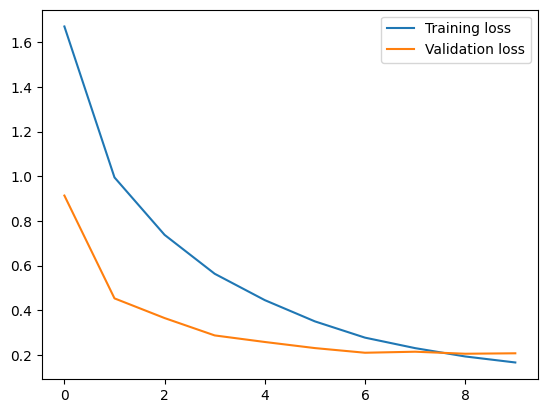

In [38]:
# Plotting the loss for both the training set and the cross valdidation set
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

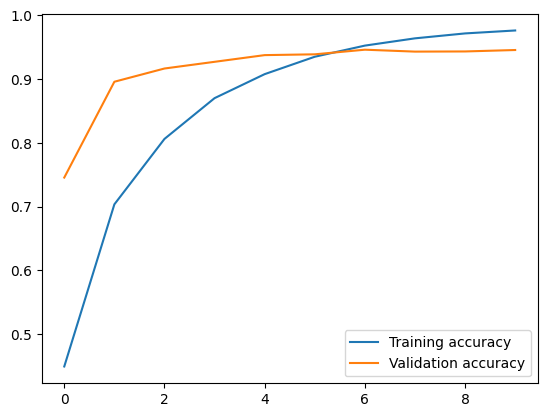

In [39]:
# Plotting the accuracy for the training set and the cross valdidation set
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()